In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('drinks.csv')
df = data[['beer_servings', 'spirit_servings', 'wine_servings']]
#plt
df.isnull().sum()

beer_servings      0
spirit_servings    0
wine_servings      0
dtype: int64

In [5]:
df.head()

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45


In [6]:
df.describe()

,beer_servings,spirit_servings,wine_servings
count,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777
std,101.143103,88.284312,79.697598
min,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000
50%,76.000000,56.000000,8.000000
75%,188.000000,128.000000,59.000000
max,376.000000,438.000000,370.000000


In [7]:
df.dtypes

beer_servings      int64
spirit_servings    int64
wine_servings      int64
dtype: object

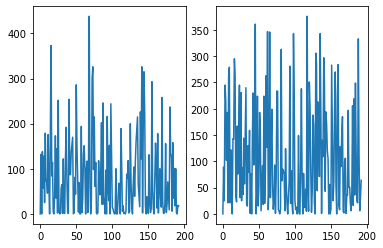

In [11]:
#plt.plot(df['beer_servings'])
#plt.plot(df['spirit_servings'])
#plt.plot(df['wine_servings'], linestyle='--')
l = ['spirit_servings', 'beer_servings']
for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.plot(df[l[i-1]])

#seems there is is some correlation btwn beer servings and wine servings-lets see

In [45]:
#i try to predict beer servings in a country using linear regression
beer_model = smf.ols(formula = 'beer_servings ~ spirit_servings', data = df).fit()
beer_model.params

Intercept          63.585956
spirit_servings     0.525647
dtype: float64

In [52]:
beer_model.predict(pd.DataFrame({'spirit_servings': [57]}))

0    93.547823
dtype: float64

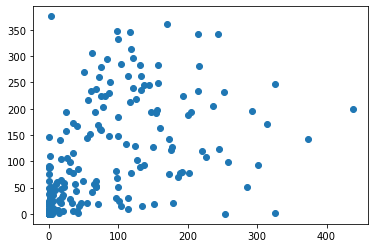

In [65]:
#scatter to show relationship
plt.scatter(df['spirit_servings'], df['beer_servings'], label='Spirit Servings by Beer Servings')

In [51]:
beer_model.pvalues

Intercept          1.229379e-11
spirit_servings    1.938650e-11
dtype: float64

In [54]:
wine_model = smf.ols(formula='beer_servings ~ wine_servings', data=df).fit()
wine_model.params

Intercept        73.076757
wine_servings     0.669026
dtype: float64

In [61]:
wine_model.predict(pd.DataFrame({'wine_servings':[312]}))

0    281.812928
dtype: float64

In [66]:
wine_model.conf_int()

,0,1
Intercept,58.667744,87.485769
wine_servings,0.515112,0.822940


In [71]:
multiple_regression = smf.ols(formula='beer_servings ~ wine_servings + spirit_servings', data=df).fit()
multiple_regression.params

Intercept          43.252971
wine_servings       0.577514
spirit_servings     0.424091
dtype: float64

In [72]:
#how the models fit
multiple_regression.rsquared

0.4097390807089717

In [73]:
beer_model.rsquared

0.21051475926653018

In [74]:
wine_model.rsquared

0.27790999443453324

In [75]:
#so in conclusion the multiple regression is better

In [26]:
#predict continent by alcohol consumption using neural networks
final_df = data.loc[data['continent'].isna() == False]
final_df.drop(['country'], axis=1, inplace=True)
X = final_df.drop(['continent'], axis=1)
y = final_df['continent']

C:\Users\Yamikani\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 170, dtype: object

In [27]:
#transform y to binary
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

array([1, 2, 0, 2, 0, 4, 2, 3, 2, 2, 1, 1, 2, 2, 0, 1, 4, 2, 0, 4, 1, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 4, 1, 4, 0, 0, 3, 2, 2, 2, 1, 0, 2, 0, 4,
       0, 0, 0, 2, 0, 3, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 4, 2, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 0, 3, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0, 2, 3, 0, 0, 3, 2, 1, 2, 0, 0, 1, 0, 3, 1, 2, 3, 0, 0, 3, 2,
       1, 1, 3, 3, 4, 4, 1, 2, 2, 1, 1, 2, 2, 1, 0, 3, 2, 0, 1, 0, 2, 0,
       0, 1, 2, 2, 3, 0, 0, 2, 1, 0, 4, 0, 2, 2, 1, 1, 1, 2, 1, 0, 3, 0,
       1, 1, 3, 0, 2, 1, 2, 0, 4, 1, 3, 4, 1, 1, 0, 0])

In [34]:
#split to training data, test
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [1]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2, 2), random_state=1)


In [47]:
clf.fit(xtrain, ytrain)

C:\Users\Yamikani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 5, 2), random_state=1,
              solver='lbfgs')

In [48]:
clf.score(xtest, ytest)

0.5490196078431373